## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Reading Data

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
bike.shape

(730, 16)

In [5]:
# Inspecting columns

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# season, yr, mnth, holiday, weekday, workingday and weathersit are all categorical variables 
# and should be converted to object type

In [8]:
bike[['yr','holiday','workingday','season', 'mnth', 'weekday', 'weathersit']] = bike[['yr','holiday','workingday','season', 'mnth', 'weekday', 'weathersit']].astype(object)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [10]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# There are no null values in the dataset

In [12]:
bike.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### instant and dteday are not required for model building, so they should be removed
### casual and registered are not features, so they should also be removed

In [13]:
bike.drop(columns = ['instant','dteday','casual','registered'], inplace=True)

In [14]:
# Checking correlation of all continuous columns

In [15]:
bike.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

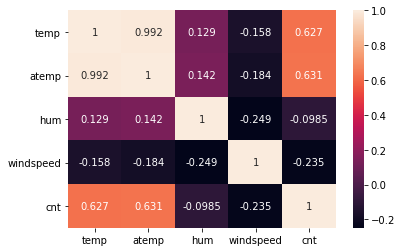

In [16]:
sns.heatmap(bike.corr(), annot=True, fmt='0.3g')

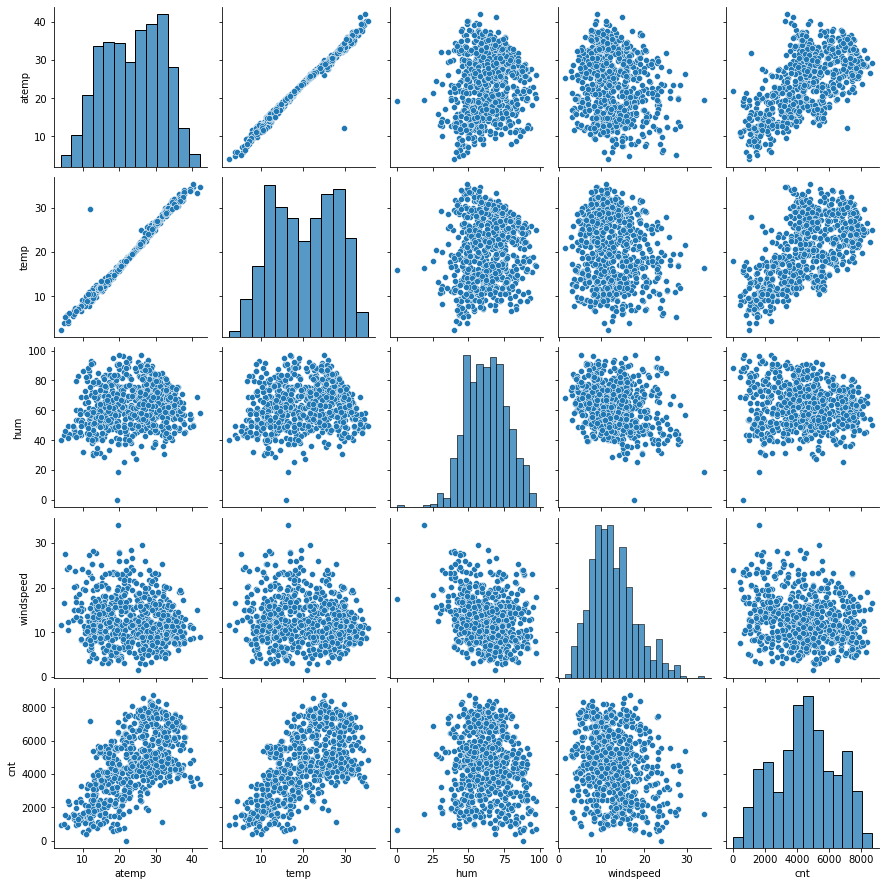

In [17]:
sns.pairplot(bike, x_vars = ['atemp','temp', 'hum','windspeed','cnt'], y_vars = ['atemp','temp', 'hum','windspeed','cnt'] )
plt.show()

### atemp and temp are highly correlated with eachother
### atemp has a marginally higher correlation with cnt, so it should be removed

In [18]:
bike.drop(columns='atemp', inplace=True)

<AxesSubplot:>

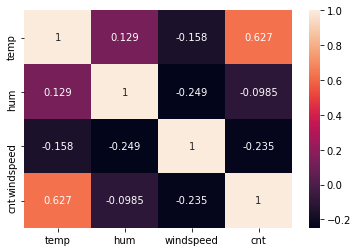

In [19]:
sns.heatmap(bike.corr(), annot=True, fmt='0.3g')

### Renaming the categorical columns as per data dicionary

In [20]:
bike['season'] = bike['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [21]:
bike['mnth'] = bike['mnth'].map({1:'January',
                               2:'February',
                               3:'March',
                               4:'April',
                               5:'May',
                               6:'June',
                               7:'July',
                               8:'August',
                               9:'September',
                               10:'October',
                               11:'November',
                               12:'December'})

In [22]:
bike['weekday'] = bike['weekday'].map({0:'Monday',
                               1:'Tuesday',
                               2:'Wednesday',
                               3:'Thursday',
                               4:'Friday',
                               5:'Saturday',
                               6:'Sunday'})

In [23]:
bike['weathersit'] = bike['weathersit'].map({1:'Clear',
                                           2:'Mist',
                                           3:'Light_rain',
                                           4:'Heavy_rain'})

In [24]:
bike['holiday'] = bike['holiday'].map({1:'holiday',0:'not_a_holiday'})

In [25]:
bike['yr'] = bike['yr'].map({0:2018,1:2019})

In [26]:
bike['workingday'] = bike['workingday'].map({0:'not_a_workingday',1:'workingday'})

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,January,not_a_holiday,Tuesday,workingday,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,January,not_a_holiday,Wednesday,workingday,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,January,not_a_holiday,Thursday,workingday,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,January,not_a_holiday,Friday,workingday,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,January,not_a_holiday,Saturday,workingday,Clear,9.305237,43.6957,12.522300,1600


### Exploring the categorical columns and their relation with target variable

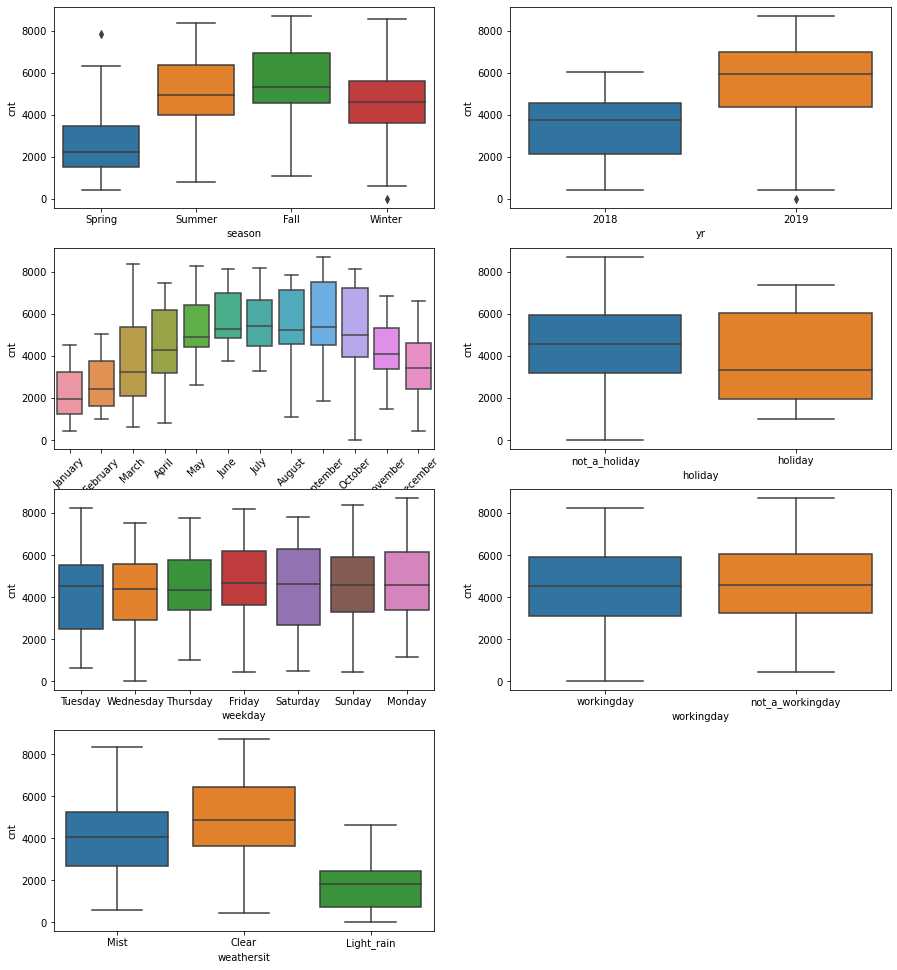

In [28]:
plt.figure(figsize=(15,17))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data = bike)
plt.xticks(rotation=45)
plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data = bike)
plt.show()

### Getting dummy variables for the categorical columns

In [29]:
weekday = pd.get_dummies(bike['weekday'], drop_first=True)

In [30]:
weather = pd.get_dummies(bike['weathersit'], drop_first=True)

In [31]:
year = pd.get_dummies(bike['yr'], drop_first=True)

In [32]:
holiday = pd.get_dummies(bike['holiday'], drop_first=True)

In [33]:
workingday = pd.get_dummies(bike['workingday'], drop_first=True)

In [34]:
month = pd.get_dummies(bike['mnth'])

In [35]:
# Concatenating the dummy variables with the main dataset

In [36]:
bike = pd.concat([bike,weekday,weather,month,year,holiday,workingday], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,July,June,March,May,November,October,September,2019,not_a_holiday,workingday
0,Spring,2018,January,not_a_holiday,Tuesday,workingday,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,1,1
1,Spring,2018,January,not_a_holiday,Wednesday,workingday,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,1
2,Spring,2018,January,not_a_holiday,Thursday,workingday,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,1,1
3,Spring,2018,January,not_a_holiday,Friday,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,1
4,Spring,2018,January,not_a_holiday,Saturday,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,1


In [37]:
# Dropping the original categorical variables as we no longer need them

In [38]:
bike.drop(bike[['mnth','season','weekday','weathersit','yr','workingday','holiday']],axis=1,inplace=True)

In [39]:
bike.head()

,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,January,July,June,March,May,November,October,September,2019,not_a_holiday
0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [40]:
#### Checking scatterplot of numerical variables with the target variable

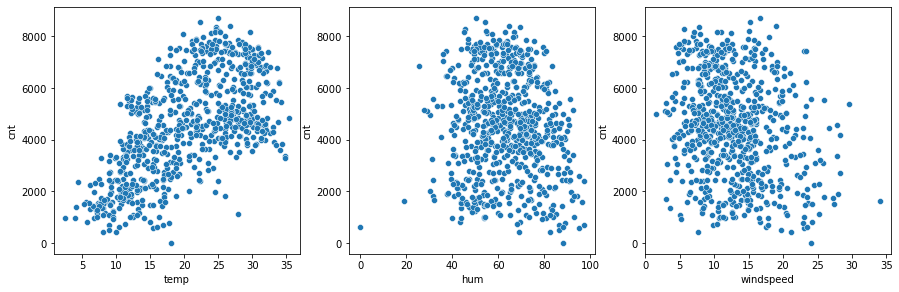

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(x='temp', y='cnt', data=bike)
plt.subplot(2,3,2)
sns.scatterplot(x='hum', y='cnt', data=bike)
plt.subplot(2,3,3)
sns.scatterplot(x='windspeed', y='cnt', data=bike)
plt.show()

In [42]:
# People don't seem to ride bikes at lower temperatures
# Therefore the count of bike rides during winters are lesser

In [43]:
# Data prepartion is complete

## Train-Test-Split

In [44]:
# I will do a 75:25 split

In [45]:
df_train,df_test = train_test_split(bike, train_size=0.75, random_state=100)

In [46]:
print(df_train.shape)
print(df_test.shape)

(547, 26)
(183, 26)


## Feature Scaling

In [47]:
# Feature scaling using MinMaxScaler()

In [48]:
scaler = MinMaxScaler()

In [49]:
num_vars = ['temp','hum','windspeed']

In [50]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
df_train.head()

,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,January,July,June,March,May,November,October,September,2019,not_a_holiday
311,0.435124,0.743667,0.057471,4205,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
523,0.735215,0.482181,0.286093,7736,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
381,0.391151,0.737917,0.659615,2935,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
413,0.358285,0.550880,0.319514,4318,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
253,0.740406,0.735509,0.156398,5046,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [52]:
# storing the target and predictor variables

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

In [54]:
# Making a model with all variables to get p-values

In [55]:
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.11e-186
Time:                        17:11:38   Log-Likelihood:                -4429.5
No. Observations:                 547   AIC:                             8909.
Df Residuals:                     522   BIC:                             9017.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1848.2783    347.683      5.316      0.000    1165.248    2531.308
temp           3813.8832    402.173      9.483      0.000    3023.807    4603.959
hum           -1194.6982    345.214     -3.461      0.001   -1872.878    -516.518
windspeed     -1656.6972    227.115     -7.295      0.000   -2102.869   -1210.526
Monday           57.0450    134.828      0.423      0.672    -207.827     321.917
Saturday        -38.5658    132.531     -0.291      0.771    -298.925     221.794
Sunday           -8.6300    136.648     -0.063      0.950    -277.078     259.818
Thursday        -66.8952    134.294     -0.498      0.619    -330.719     196.928
Tuesday        -287.1188    130.985     -2.192      0.029    -544.441     -29.797
Wednesday      -252.6112    128.415     -1.967      0.050    -504.885      -0.338
Light_rain    -2196.3600    241.006     -9.113      0.000   -2669.821   -1722.899
Mist           -491.9662     92.549     -5.316      0.000    -673.780    -310.152
April           372.6450    126.842      2.938      0.003     123.462     621.828
August          172.9655    164.370      1.052      0.293    -149.943     495.874
December         18.6090    137.307      0.136      0.892    -251.132     288.350
February       -728.3084    148.920     -4.891      0.000   -1020.864    -435.752
January        -963.7306    160.450     -6.006      0.000   -1278.938    -648.524
July           -295.3436    191.932     -1.539      0.124    -672.398      81.710
June            350.0859    162.858      2.150      0.032      30.148     670.024
March          -147.2195    117.544     -1.252      0.211    -378.137      83.698
May             506.5813    135.196      3.747      0.000     240.986     772.177
November        589.1702    126.809      4.646      0.000     340.052     838.288
October        1030.3251    121.015      8.514      0.000     792.589    1268.061
September       942.4982    142.822      6.599      0.000     661.922    1223.074
2019           2022.1667     71.277     28.371      0.000    1882.142    2162.191
not_a_holiday  1052.9912    223.258      4.716      0.000     614.397    1491.585
==============================================================================
Omnibus:                       74.819   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.186
Skew:                          -0.743   Prob(JB):                     4.97e-37
Kurtosis:                       5.264   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-30. This might indicate that there are
strong multicollinearity problems or that the design ma

## Checking p values and eliminating variables using RFE

## Model 1 with RFE 15

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 9),
 ('Sunday', False, 11),
 ('Thursday', False, 8),
 ('Tuesday', False, 2),
 ('Wednesday', False, 3),
 ('Light_rain', True, 1),
 ('Mist', True, 1),
 ('April', False, 4),
 ('August', False, 10),
 ('December', False, 6),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('March', True, 1),
 ('May', True, 1),
 ('November', True, 1),
 ('October', True, 1),
 ('September', True, 1),
 (2019, True, 1),
 ('not_a_holiday', True, 1)]

In [58]:
col = X_train.columns[rfe.support_]
col

Index([         'temp',           'hum',     'windspeed',    'Light_rain',
                'Mist',      'February',       'January',          'July',
               'March',           'May',      'November',       'October',
           'September',            2019, 'not_a_holiday'],
      dtype='object')

In [59]:
X_train_rfe = X_train[col]

In [60]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [61]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.93e-192
Time:                        17:11:38   Log-Likelihood:                -4437.9
No. Observations:                 547   AIC:                             8908.
Df Residuals:                     531   BIC:                             8977.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1897.9845    340.566      5.573

In [62]:
#  dropping constant to check the VIF

In [63]:
X_train_1 = X_train_rfe.drop(columns = 'const')

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,hum,27.03
14,not_a_holiday,22.87
0,temp,14.65
2,windspeed,4.46
4,Mist,2.22
13,2019,2.06
6,January,1.70
5,February,1.44
7,July,1.44
8,March,1.42


In [65]:
# 'hum' has the highest VIF

## Model 2 with RFE 10

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 14),
 ('Sunday', False, 16),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('Light_rain', True, 1),
 ('Mist', False, 4),
 ('April', False, 9),
 ('August', False, 15),
 ('December', False, 11),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('March', False, 5),
 ('May', False, 6),
 ('November', False, 3),
 ('October', True, 1),
 ('September', False, 2),
 (2019, True, 1),
 ('not_a_holiday', True, 1)]

In [68]:
col = X_train.columns[rfe.support_]
col

Index([         'temp',           'hum',     'windspeed',    'Light_rain',
            'February',       'January',          'July',       'October',
                  2019, 'not_a_holiday'],
      dtype='object')

In [69]:
X_train_rfe = X_train[col]

In [70]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.40e-183
Time:                        17:11:39   Log-Likelihood:                -4472.7
No. Observations:                 547   AIC:                             8967.
Df Residuals:                     536   BIC:                             9015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2366.2773    330.271      7.165

In [72]:
X_train_2 = X_train_rfe.drop(columns = 'const')

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values,i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,not_a_holiday,20.79
1,hum,17.91
0,temp,11.34
2,windspeed,4.26
8,2019,2.05
5,January,1.44
6,July,1.34
4,February,1.26
7,October,1.17
3,Light_rain,1.12


In [74]:
# 'not_a-holiday' has the highest VIF right now

## Model 3 after dropping 'not_a_holiday'

In [75]:
X_train_3 = X_train_rfe.drop(columns = ['const','not_a_holiday'])

In [76]:
X_train_lm = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     239.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.99e-182
Time:                        17:11:39   Log-Likelihood:                -4479.8
No. Observations:                 547   AIC:                             8980.
Df Residuals:                     537   BIC:                             9023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3184.7303    251.091     12.684      0.0

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,hum,11.02
0,temp,10.27
2,windspeed,3.66
8,2019,2.03
5,January,1.39
6,July,1.34
4,February,1.23
7,October,1.17
3,Light_rain,1.11


In [78]:
# 'hum' has the highest VIF

## Model 4 after dropping 'hum'

In [79]:
X_train_4 = X_train_rfe.drop(columns = ['const','not_a_holiday','hum'])

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values,i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,3.91
1,windspeed,3.40
7,2019,2.02
5,July,1.25
3,February,1.16
4,January,1.16
6,October,1.13
2,Light_rain,1.07


In [81]:
X_train_lm = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     242.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.95e-173
Time:                        17:11:39   Log-Likelihood:                -4503.8
No. Observations:                 547   AIC:                             9026.
Df Residuals:                     538   BIC:                             9064.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1842.2285    169.861     10.846      0.0

In [82]:
# Now all the VIFs are under 5, however we can still check another model

## Model 5 after dropping 'temp'

In [83]:
X_train_5 = X_train_rfe.drop(columns = ['const','not_a_holiday','hum','temp'])

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values,i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,windspeed,1.97
6,2019,1.70
2,February,1.12
5,October,1.12
3,January,1.11
4,July,1.07
1,Light_rain,1.06


In [85]:
X_train_lm = sm.add_constant(X_train_5)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.11e-117
Time:                        17:11:39   Log-Likelihood:                -4635.9
No. Observations:                 547   AIC:                             9288.
Df Residuals:                     539   BIC:                             9322.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4393.5521    123.121     35.685      0.0

#### The R squared has dropped significantly after removing 'temp', therefore I will select model 4

In [86]:
# All the variables selected in Model 4 have a p-value of 0, indicating that they are all significant
# and the VIFs are also under 5, so the multicollinearity has also been handled

In [87]:
# Running Model 4 again

In [88]:
X_train_4 = X_train_rfe.drop(columns = ['const','not_a_holiday','hum'])

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values,i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,3.91
1,windspeed,3.40
7,2019,2.02
5,July,1.25
3,February,1.16
4,January,1.16
6,October,1.13
2,Light_rain,1.07


In [90]:
X_train_lm = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     242.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.95e-173
Time:                        17:11:39   Log-Likelihood:                -4503.8
No. Observations:                 547   AIC:                             9026.
Df Residuals:                     538   BIC:                             9064.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1842.2285    169.861     10.846      0.0

In [91]:
#### all p-values are 0, R-squared is 0.783 and Adj. R-Squared is 0.779

## Residual analysis

In [92]:
y_train_cnt = lm.predict(X_train_lm)

In [93]:
num_vars = ['temp','hum','windspeed']

In [94]:
# transforming the test dataset

In [95]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [96]:
# Storing the predictor and target variables

In [97]:
y_test = df_test.pop('cnt')
X_test = df_test

In [98]:
# Adding columns of Model 4
X_test_new = X_test[X_train_4.columns]

In [99]:
X_test_new = sm.add_constant(X_test_new)

In [100]:
y_pred = lm.predict(X_test_new)

#### Scatter plot showing the distribution of the predicted values vs. the actual values

Text(0, 0.5, 'y_pred')

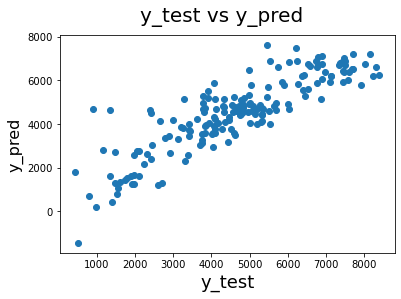

In [101]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#### Error terms are normally distributed

<function matplotlib.pyplot.show(close=None, block=None)>

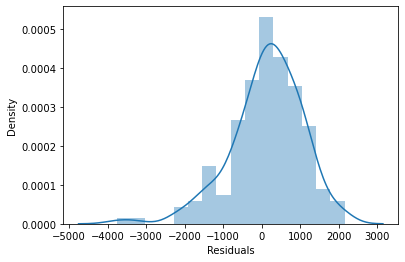

In [102]:
res = y_test - y_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.show

## Final r2 score based on Model 4

In [103]:
print(r2_score(y_test, y_pred))

0.7439649415523002


#### The final R-Squared value on test data set is 0.74 (approx.)

#### The equation of the best fitted line is given as follows:
##### cnt = temp  *  4285.9411 + windspeed *  -1508.9209 + Light_rain  *  -2158.1515 + February  *  -2035.2242  + January  *  -1166.9057 + July * -611.0912  + October * 590.9196 + '2019' * 2032.5248